In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

from netCDF4 import Dataset


import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
rcParams.update({'font.size': 18})

In [27]:
# load observational data points

infile ='../data/obs_coords.xlsx'
obs = pd.read_excel(infile)

print obs.columns

# import MDT data
infile = '../../kuroshio_productivity/data/mdt/mdt_cnes_cls2013_global.nc'
mdt_data = Dataset(infile, mode='r')

mdt_data.variables

mdt = np.squeeze(mdt_data.variables['mdt'])
lats = mdt_data.variables['lat'][:]
lons = mdt_data.variables['lon'][:]

lon_mdt, lat_mdt = np.meshgrid(lons, lats)

mdt[mdt<-3] = np.nan

Index([u'year', u'month', u'ref', u'lat', u'lon', u'method', u'result'], dtype='object')


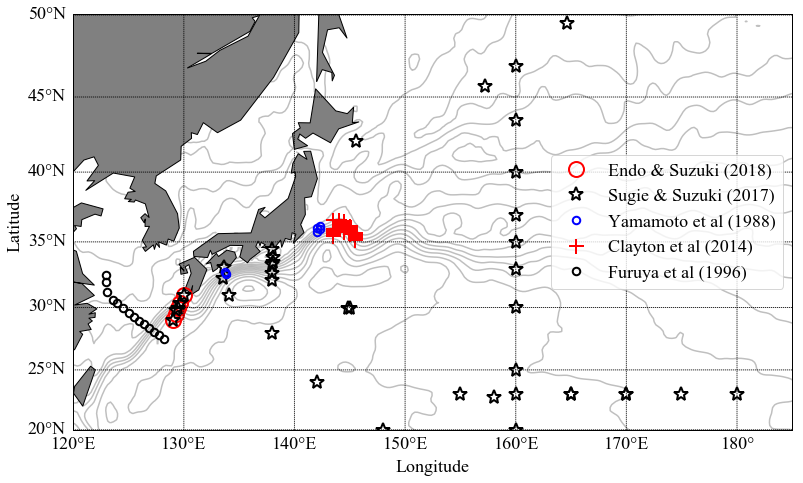

In [52]:
fig0, ax1 = plt.subplots(1, figsize=(12,7), dpi = 300)

m = Basemap(projection='merc',llcrnrlat=20.,urcrnrlat=50.05,\
            llcrnrlon=120.,urcrnrlon=185.,lat_ts=0,resolution='c', ax = ax1)

mcon = plt.get_cmap('RdYlBu_r', 30)

xii, yii = m(lon_mdt, lat_mdt)
# mm = m.contourf(xii,yii,mdt, cmap = mcon, vmin = -0.5, vmax = 1.75, lw = 3, zorder = 0, alpha = 0.5)
# m.colorbar(mm)

m.contour(xii,yii,mdt,levels = np.arange(-2, 2, 0.1), colors = 'grey', lw = 5, zorder = 1, alpha = 0.5)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

palette = plt.get_cmap('RdYlBu_r', 15)
palette.set_bad('w',1.0)

# pcol(XC, YC, div, projection=m, vmin=2., vmax=17., cmap = palette)
co = ['or', '*k', '.b', '+r', '.k']

i =0
for n in pd.unique(obs.ref):
    temp = obs[obs.ref==n]
    x, y = m(temp['lon'].values, temp['lat'].values)
    m.plot(x, y, co[i], label = n, markersize = 15, mew=2, markerfacecolor='None')
    i += 1

# cb = m.colorbar()
# cb.set_label('Modeled richness')

m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1])

plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.xlabel('Longitude', labelpad = 30)
plt.ylabel('Latitude', labelpad = 50)

plt.legend(loc = 'center right')
# plt.title('Observations', fontsize = 18)


fig0.savefig('../figures/Figure2.png', dpi = 300)

In [14]:
mdt.min()

-2147483647.0

In [48]:
type([aa][0])

list